# Research questions

## 1.How does Infant and Adult mortality rates affect life expectancy?

## 2. Does Life Expectancy have positive or negative relationship with drinking alcohol ?


## 3. Does schooling have positive or negative impact on the life expectancy?

In [90]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [92]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
life_expect_data = pd.read_csv("LifeExpectancyData.csv")

In [128]:
life_expect_data.shape

(2820, 22)

In [72]:
life_expect_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [73]:
life_expect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Data Cleaning

In [75]:
# some columns have whitespaces in their names, we are removing it
life_expect_data.columns = life_expect_data.columns.str.strip()


In [76]:
## removing spaces between columns names
life_expect_data.rename(columns={'Life expectancy':'Life_Expectancy',
                   'Adult Mortality':'Adult_Mortality',
                   'infant deaths':'Infant_Deaths',
                   'percentage expenditure':'Percentage_Expenditure',
                   'Hepatitis B':'Hepatitis_B',
                   'under-five deaths':'Under_Five_Deaths',
                   'Total expenditure':'Total_Expenditure',
                   'thinness  1-19 years':'Thinness_1-19_Years',
                   'thinness 5-9 years':'Thinness_5-9_Years',
                   'Income composition of resources':'Income_Composition_Of_Resources'
                  }, inplace=True)

In [77]:
life_expect_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
Infant_Deaths                        0
Alcohol                            194
Percentage_Expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
Under_Five_Deaths                    0
Polio                               19
Total_Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_1-19_Years                 34
Thinness_5-9_Years                  34
Income_Composition_Of_Resources    167
Schooling                          163
dtype: int64

In [80]:
percent_missing = life_expect_data.isnull().sum() * 100 / len(life_expect_data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
Country,0.000000
Year,0.000000
Status,0.000000
Life_Expectancy,0.340368
Adult_Mortality,0.340368
Infant_Deaths,0.000000
Alcohol,6.603131
Percentage_Expenditure,0.000000
Hepatitis_B,18.822328
Measles,0.000000


### Dealing with Missing Values

 it looks like many columns containing null values, since this is time series data assorted by country,
the best course of action would be to interpolate the data by country. 

However, when attempting to interpolate by country it doesn't fill in any values as the countries' data for all the null values are null for each year, 
so we will impute the data by year and we will impute by each year's mean value


In [82]:
imputed_data = []
for year in list(life_expect_data.Year.unique()):
    year_data = life_expect_data[life_expect_data.Year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)
life_expect_data = pd.concat(imputed_data).copy()

have another look on the null values :

In [83]:
life_expect_data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_Expectancy                    0
Adult_Mortality                    0
Infant_Deaths                      0
Alcohol                            0
Percentage_Expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under_Five_Deaths                  0
Polio                              0
Total_Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_1-19_Years                0
Thinness_5-9_Years                 0
Income_Composition_Of_Resources    0
Schooling                          0
dtype: int64

## Dataset description

In [89]:
life_expect_data.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.231777,164.741882,30.303948,4.644013,738.251295,80.322757,2419.592240,38.323713,42.035739,82.536808,6.007815,82.305166,1.742103,7481.955600,1.275499e+07,4.839464,4.870027,0.627686,11.993407
std,4.613841,9.508362,124.083816,117.926501,3.919849,1987.914858,22.682329,11467.272489,19.929396,160.445548,23.353973,2.416215,23.642961,5.077785,13159.210856,5.384718e+07,4.394616,4.482803,0.205212,3.268724
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,74.099237,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.140000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.910000,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.673000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7464.487887,1.181332e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Exploratory analysis

during our exploratory analysis we analyze our data with comparing between the developing and developed country to get a lot of interesting insights

In [98]:
life_expect_data["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

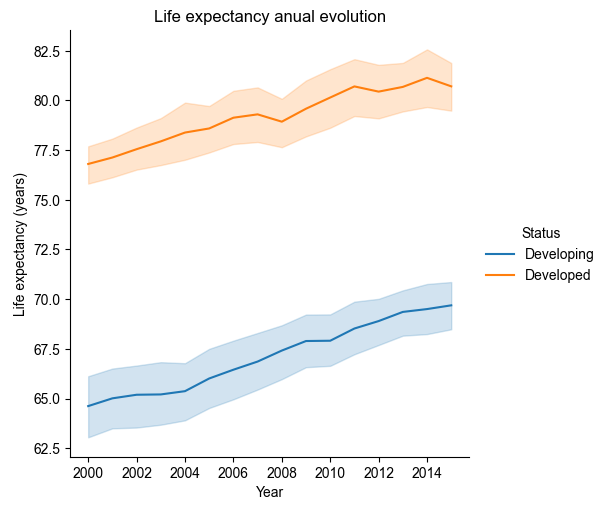

In [99]:
sns.relplot(x="Year", y="Life_Expectancy", kind="line", hue="Status",data=life_expect_data)
plt.title("Life expectancy anual evolution", fontsize=12)
sns.set_style("white")
plt.xlabel("Year")
plt.ylabel("Life expectancy (years)")
plt.show()

we can see that the rate of life expectancy increases in both developing and developed countries,
but developed countries starting with  more years than developing countries 

In [95]:
life_expect_data.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_Years',
       'Thinness_5-9_Years', 'Income_Composition_Of_Resources', 'Schooling'],
      dtype='object')

correlation of all variables with the life_expectancy variable

In [96]:
corr = life_expect_data.corr().loc["Life_Expectancy"].to_frame().iloc[1:20]
corr = corr.rename(columns={"index":"feature", "Life_Expectancy":"correlation"})
corr = corr["correlation"].sort_values(ascending=False).to_frame()

In [97]:
corr

,correlation
Life_Expectancy,1.000000
Schooling,0.716060
Income_Composition_Of_Resources,0.694136
BMI,0.560307
Diphtheria,0.475914
Polio,0.461850
GDP,0.432784
Alcohol,0.392934
Percentage_Expenditure,0.381543
Hepatitis_B,0.223382


### 1.How does Infant and Adult mortality rates affect life expectancy?

In [101]:
corr.loc["Adult_Mortality"]

correlation   -0.696379
Name: Adult_Mortality, dtype: float64

we can see that Adult_mortality has strong negative correlation with life expectancy

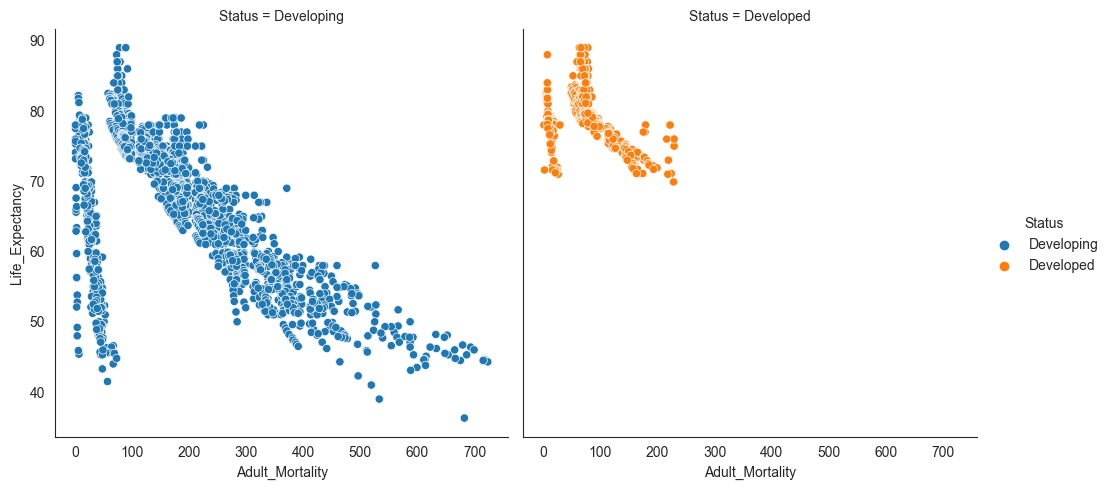

In [102]:
sns.relplot(x="Adult_Mortality", y="Life_Expectancy", hue="Status", col="Status", data=life_expect_data);


In [103]:
corr.loc["Infant_Deaths"]

correlation   -0.196705
Name: Infant_Deaths, dtype: float64

Infant deaths has kind of weak correlation with the life expectancy but maybe this correlation is misleading as a result of outliers

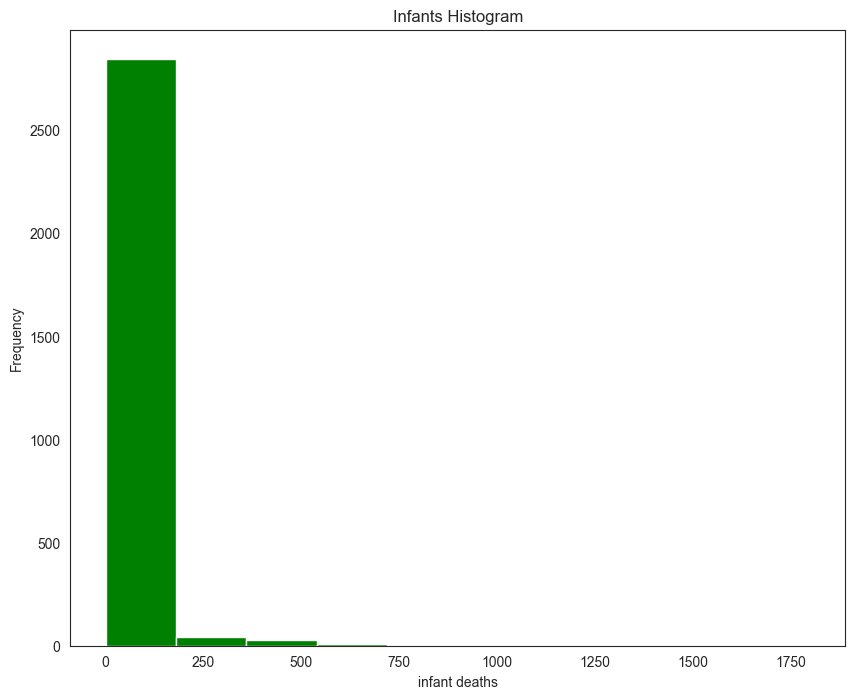

In [105]:
plt.figure(figsize=(10,8))
plt.hist(life_expect_data["Infant_Deaths"], color="green")
plt.xlabel("infant deaths")
plt.ylabel("Frequency")
plt.title("Infants Histogram");

we can see from our histogram that most of our data lies between 0 to 100

In [107]:
# handling outliers, cutting the top and bottom 4% quantile
low, high = life_expect_data["Infant_Deaths"].quantile([0.04,0.96])
mask = life_expect_data["Infant_Deaths"].between(low, high)
life_expect_data = life_expect_data[mask]

Text(0.5, 1.0, 'Infants Histogram after handling outliers')

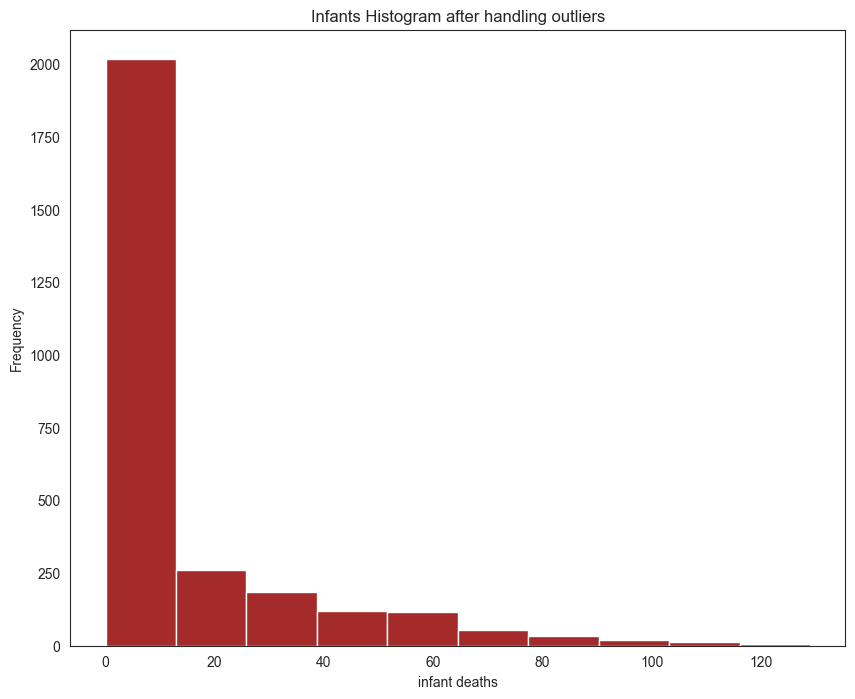

In [110]:
# histogram after handling outliers
plt.figure(figsize=(10,8))
plt.hist(life_expect_data["Infant_Deaths"], color="brown")
plt.xlabel("infant deaths")
plt.ylabel("Frequency")
plt.title("Infants Histogram after handling outliers")


checking the correlation again 

In [113]:
life_expect_data["Infant_Deaths"].corr(life_expect_data["Life_Expectancy"])


-0.5399041833589262

Huge difference , that means our assumption was right of existing of outliers misleading information

We conclude that infant deaths affect negatively the life expectancy

### 2. Does Life Expectancy have positive or negative relationship with drinking alcohol ?

In [114]:
corr.loc["Alcohol"]

correlation    0.392934
Name: Alcohol, dtype: float64

The correlation  above showed 0.39 positive correlation of between Alcohol and life expectancy, 
we have doubt that maybe we have misleading information so we will test the correlation when separating the data 
by developing and developed countries to see the result


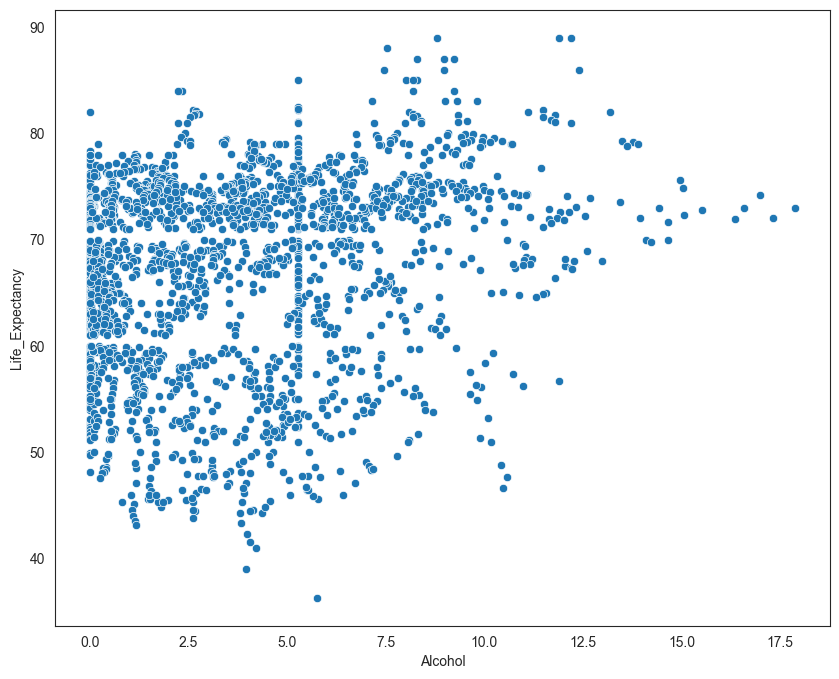

In [118]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Alcohol",
           y="Life_Expectancy",
           data = life_expect_data[life_expect_data['Status']=='Developing'])
plt.show()

Correlation between developing countries' life expectancy and alcohol

In [120]:
life_expect_data[life_expect_data['Status']=='Developing']["Alcohol"].corr(life_expect_data[life_expect_data['Status']=='Developing']["Life_Expectancy"])


0.2132540655101816

in developing countries we can see weak correlation between alcohol and life expectancy

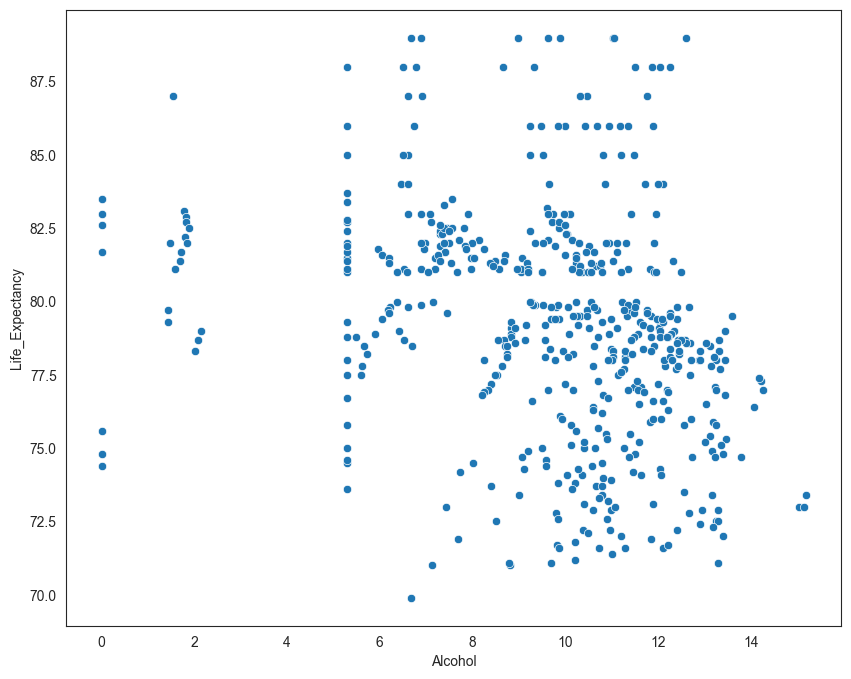

In [121]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Alcohol",
           y="Life_Expectancy",
           data = life_expect_data[life_expect_data['Status']=='Developed'])
plt.show()

Correlation between developing countries' life expectancy and alcohol

In [122]:
life_expect_data[life_expect_data['Status']=='Developed']["Alcohol"].corr(life_expect_data[life_expect_data['Status']=='Developed']["Life_Expectancy"])


-0.2908519268953034

in developed country we can see a weak negative correlation between alcohol and life expectancy

### 3- does schooling have positive or negative impact on the life expectancy?

Correlation between Schooling and life expectancy

In [123]:
corr.loc["Schooling"]

correlation    0.71606
Name: Schooling, dtype: float64

we have a slightly strong positive correlation between schooling and life expectancy = 0.71

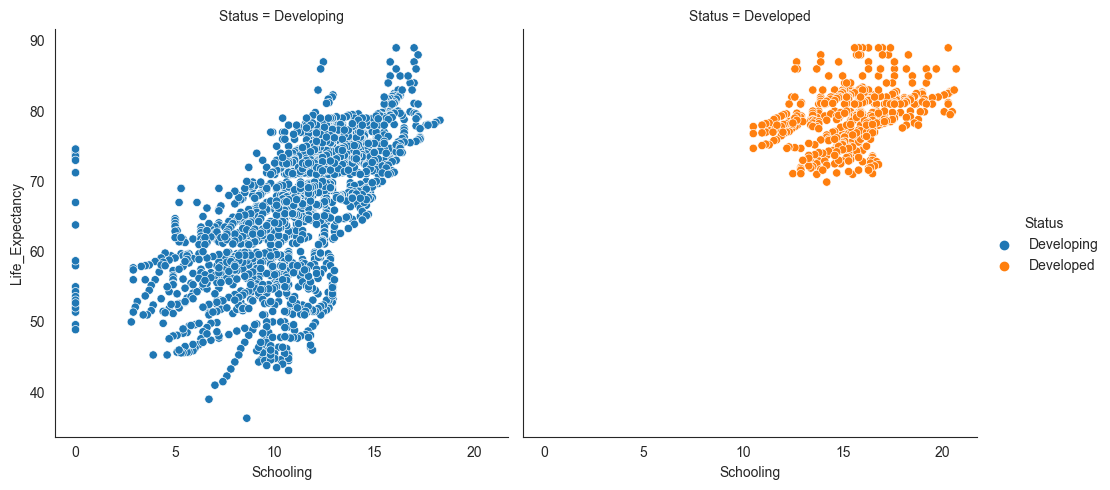

In [127]:
sns.relplot(x="Schooling", y="Life_Expectancy", hue="Status", col="Status", data=life_expect_data);

obviously Schooling has a positive impact on life expectancy